In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import random 
import scipy.stats
import pandas as pd
import bases
import preprocessing
import glm_utils
import seaborn as sns
import sklearn
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [2]:
exptList = glob.glob(r'/run/user/1000/gvfs/smb-share:server=tigress-cifs.princeton.edu,share=fileset-mmurthy/eDNA/behavior/manipulated_summer22_AK_controls/*')

In [3]:
ftrList = [os.path.basename(i).split('.csv')[0] for i in glob.glob(rf'{exptList[0]}/*2.csv')]
ftrList.extend(['distance_male_head_to_female_abdomen', 'pulse', 'sine'])

In [7]:
r2_score = {}
accuracy = {}
logloss = {}
filterShapes = {}
filterNorms = {}

# for ftr in ftrList:
# ftr = 'sine'
# x, y = glm_utils.design(exptList, ftr, 450)

results = glm_utils.pcor(x, y, 225)
r2_score[ftr] = results['r2_score']
accuracy[ftr] = results['fraction_correct']
filterShapes[ftr] = results['filtershape']
filterNorms[ftr] = results['filter_norms']
logloss[ftr] = results['logloss']
#     # break

In [23]:
x, y = glm_utils.design(exptList, ftr, 450)

1

In [21]:
ftr = 'sine'
for fly in exptList:
    feat = glm_utils.load_feature(fly, ftr)
    if not feat.any(): continue
    if np.max(feat)>1:
        print(fly)

/run/user/1000/gvfs/smb-share:server=tigress-cifs.princeton.edu,share=fileset-mmurthy/eDNA/behavior/manipulated_summer22_AK_controls/track_array_args.txt/sine.csv does not exist


In [18]:
feat

array([], dtype=float64)

In [5]:
plt.plot(x.T)
plt.tight_layout()

: 

In [8]:
print(f"Accuracy = {np.mean(accuracy[ftr])}")
print(f"logloss = {np.mean(logloss[ftr])}")
print(f"r2 = {np.mean(r2_score[ftr])}")

Accuracy = 0.6468627450980392
logloss = 0.6785670634139584
r2 = -0.41254901960784324


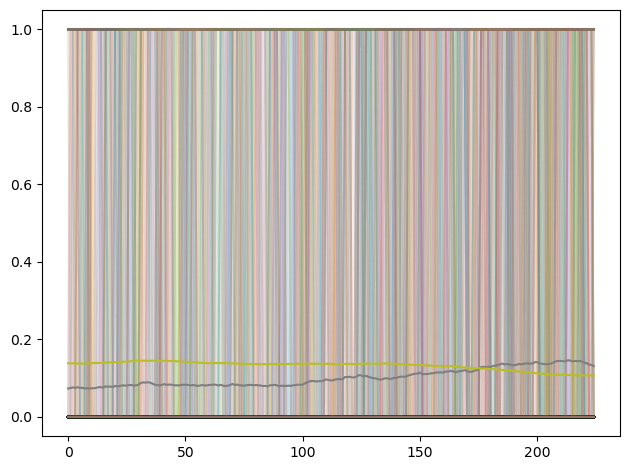

In [6]:
plt.plot(x[np.where(y)[0]].T, alpha=.1)
plt.plot(np.mean(x[np.where(y)[0]], axis=0))
plt.plot(np.mean(x[np.where(y==0)[0]], axis=0))

plt.tight_layout()

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
data, _ = glm_utils.splitTrainTest(x,y)

In [34]:
xTrain = data['xTrain']
yTrain = data['yTrain']
xTest = data['xTest']
yTest = data['yTest']

In [15]:
scaler.fit(xTrain)
xTrain = scaler.transform(xTrain)

In [35]:
clr = sklearn.linear_model.LogisticRegressionCV(max_iter=10000)

In [36]:
Xtrain = np.dot(xTrain, B)
# Xtest = scaler.transform(xTest)
Xtest = np.dot(xTest, B)

In [37]:
clr.fit(Xtrain, yTrain)

LogisticRegressionCV(max_iter=10000)

In [38]:
probs = clr.predict_proba(Xtest)

In [39]:
probClasses = clr.predict(Xtest)

In [40]:
clr.score(Xtest, yTest)

0.5919540229885057

In [47]:
filterNorms[ftr]

[0.002710720201127381,
 0.0033598954581404578,
 0.0030741866189161163,
 0.0031608328510988612,
 0.0028461270275798273,
 0.003237041923674047,
 0.0036172675738157215,
 0.00362795427346685,
 0.0034406204417701974,
 0.003623541723732445,
 0.0030359816455029264,
 0.003464230228723853,
 0.0033693779409671182,
 0.0028693154666891646,
 0.0032521583612783083,
 0.003079737852706345,
 0.0024836260895501863,
 0.003531298398634267,
 0.0035937134113398542,
 0.0032742695522413414,
 0.003424488803752157,
 0.0031242377025411053,
 0.003307392284262544,
 0.0035921057131994053,
 0.002222780398268623,
 0.002892540156106657,
 0.0031636087309183003,
 0.0035801616487129923,
 0.003000394899805398,
 0.003898422463632211,
 0.003214362392378431,
 0.0035884902313858278,
 0.0030511999141775575,
 0.003205953213299777,
 0.00397244958031723,
 0.004020577824894335,
 0.0036581078280804318,
 0.003273696970806092,
 0.0028779917296748577,
 0.0039407250870809275,
 0.0023896252376060813,
 0.0031116521382108992,
 0.003561095

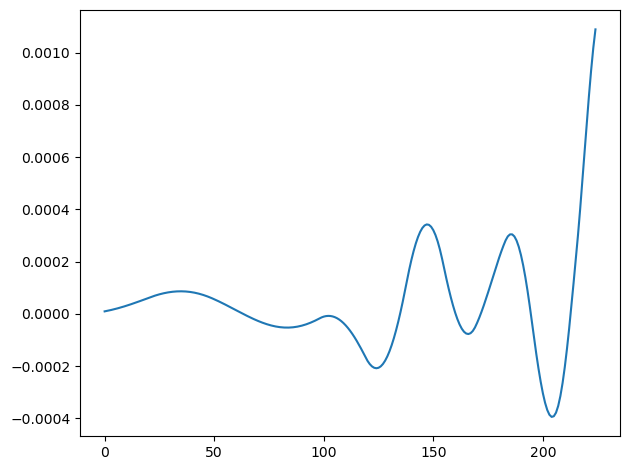

In [46]:
plt.plot(np.mean(filterShapes[ftr], axis=0))
plt.tight_layout()

In [29]:
vidlen = range(270000)
start = 1000
stop = 2000
trial = vidlen[start:stop:2]

In [36]:
len(trial)

500

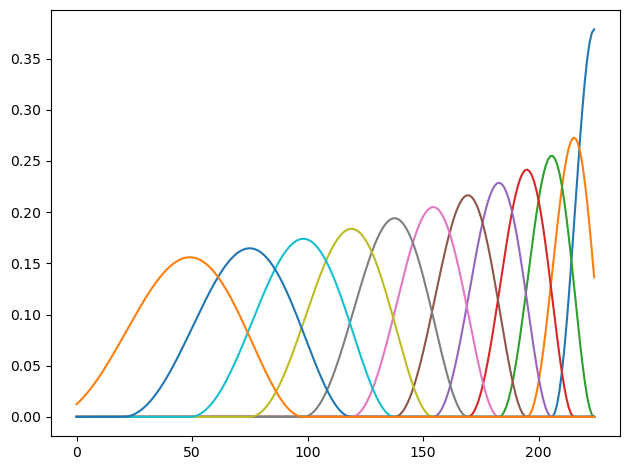

In [18]:
B = bases.raised_cosine(0, 12, [0,175], 75, 225)
plt.plot(B)
plt.tight_layout()

In [ ]:
df = pd.DataFrame(columns=['feature', 'stat','value'])
for stat in results.keys():
    for i in range(len(results['r2_score'])):
        df.loc[len(df.index)] = [ftr, stat, results[stat][i]]


In [ ]:
df[df['stat']=='fraction_correct']['value'].mean()

0.5698554913294795

In [ ]:
df[df['stat']=='r2_score']['value'].min()

-0.9421965317919074

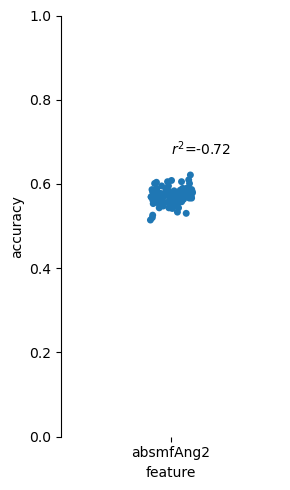

In [9]:
plt.figure(figsize=(3,5))
sns.stripplot(data=df[df['stat']=='fraction_correct'], x='feature', y='value')
plt.ylabel('accuracy')
plt.text(0, df[df['stat']=='fraction_correct']['value'].mean()+0.1, s=f"$r^2$={df[df['stat']=='r2_score']['value'].mean():0.2f}")
plt.ylim(0,1)
sns.despine(bottom=True)
plt.tight_layout()


In [45]:
filters = np.stack(df[df['stat']=='filtershape']['value'].to_numpy())

In [56]:
np.mean(filters, axis=0)

array([1.52449395e-05, 1.55493191e-05, 1.58567410e-05, ...,
       1.23495491e-02, 1.27836950e-02, 1.32062896e-02])

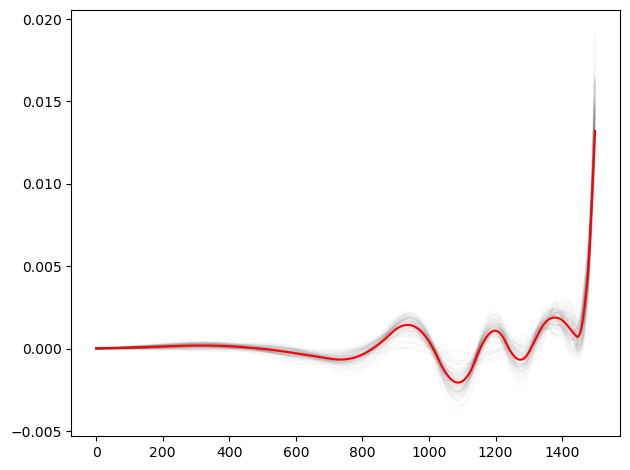

In [57]:
plt.plot(filters.T, c='k', alpha=.01)
plt.plot(np.mean(filters, axis=0), c='r')
plt.tight_layout()